# Missing values, normalisation, classifier evaluation

In [40]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import preprocessing
import seaborn as sns

## Exercise 1

Given dataset (as an Numpy array) that contains  records about 50 persons: (Gender, Height, Weight, Index).
- Gender = 0 (Male); 1 (Female) (binary)
- Height = person's height in cm (integer)
- Weight = person's weight in kg (integer)
- Index = 0 - Extremely Weak; 1 - Weak; 2 - Normal; 3 - Overweight; 4 - Obesity; 5 - Extreme Obesity (integer from 0 to 5)

In [4]:
dataset = np.array([[0, 174, -1, 4], [0, 189, 87, 2], [1, 185, 110, 4], [1, 195, 104, 3], [0, 149, 61, 3], [0, 1893, 104, 3], [0, 147, 92, 5], [0, 154, 111, 5], [0, 174, 2, 3], [10, 169, 103, 4], [0, 195, 81, 2], [-1, 159, 80, 4], [1, 192, 101, 3], [0, 155, 51, 2], [0, 191, 379, 2], [1, 4, 107, 5], [1, 157, 110, 5], [0, 140, 129, 5], [0, 144, 145, 5], [0, 172, 139, -5], [0, 157, 110, 5], [1, 153, 149, 5], [1, 169, 97, 4], [0, 185, 139, 5], [1, 172, 67, 2], [1, 151, 64, 3], [0, 190, 95, 3], [0, 187, 62, 1], [1, 163, 159, 5], [0, 179, 152, 5], [0, 153, 121, 5], [0, 178, 52, 1], [1, 195, 65, 1], [1, 160, 131, 5], [1, 157, 153, 5], [1, 189, 132, 4], [1, 197, 114, 3], [0, 144, 80, 4], [1, 171, 152, 5], [1, 185, 81, 2], [1, 175, 120, 4], [1, 149, 108, 5], [0, 157, 56, 2], [0, 161, 118, 5], [1, 182, 126, 4], [0, 185, 76, 2], [1, 188, 122, 4], [0, 181, 111, 4], [0, 161, 72, 3], [0, 140, 152, 5]])

1. Output the records with noisy data, i.e., records where values of some features are most likely incorrect (you can assume that Height should be in the range $[50,220]$, and Weight in the range $[50, 160]$)

In [5]:
height = dataset[:, 1].astype(int)
weight = dataset[:, 2].astype(int)

noisy_data = np.where(~((height >= 50) & (height <= 220) & (weight >= 50) & (weight <= 160)))

noisy_records = dataset[noisy_data]

print("Records with noisy data:")
for record in noisy_records:
    print(record)

Records with noisy data:
[  0 174  -1   4]
[   0 1893  104    3]
[  0 174   2   3]
[  0 191 379   2]
[  1   4 107   5]


2. Create a new dataset where noisy records (those that were identified as noisy in the previous step) are removed

In [8]:
without_noise = np.delete(dataset, noisy_data, axis=0)

In [9]:
print("Records without noisy data:")
for record in without_noise:
    print(record)

Records without noisy data:
[  0 189  87   2]
[  1 185 110   4]
[  1 195 104   3]
[  0 149  61   3]
[  0 147  92   5]
[  0 154 111   5]
[ 10 169 103   4]
[  0 195  81   2]
[ -1 159  80   4]
[  1 192 101   3]
[  0 155  51   2]
[  1 157 110   5]
[  0 140 129   5]
[  0 144 145   5]
[  0 172 139  -5]
[  0 157 110   5]
[  1 153 149   5]
[  1 169  97   4]
[  0 185 139   5]
[  1 172  67   2]
[  1 151  64   3]
[  0 190  95   3]
[  0 187  62   1]
[  1 163 159   5]
[  0 179 152   5]
[  0 153 121   5]
[  0 178  52   1]
[  1 195  65   1]
[  1 160 131   5]
[  1 157 153   5]
[  1 189 132   4]
[  1 197 114   3]
[  0 144  80   4]
[  1 171 152   5]
[  1 185  81   2]
[  1 175 120   4]
[  1 149 108   5]
[  0 157  56   2]
[  0 161 118   5]
[  1 182 126   4]
[  0 185  76   2]
[  1 188 122   4]
[  0 181 111   4]
[  0 161  72   3]
[  0 140 152   5]


3. In the cleaned dataset, compute the means (i.e., average) of Height and Weight features (rounded to the nearest integer)

In [22]:
average_height_weight = without_noise[:,[1,2]]
np.mean(average_height_weight, axis=0)

# axis = 0 --> by column, axis = 1 --> by row

array([169.24444444, 105.33333333])

4. Plot the data points from the cleaned dataset: For every record, plot the point with coordinates (Height, Weight), i.e. Height is along the X-axis and Weight is along the Y-axis. Use different colors/shapes of points for records with different value of Index. Can you see separation between the classes of objects with different values of Index?

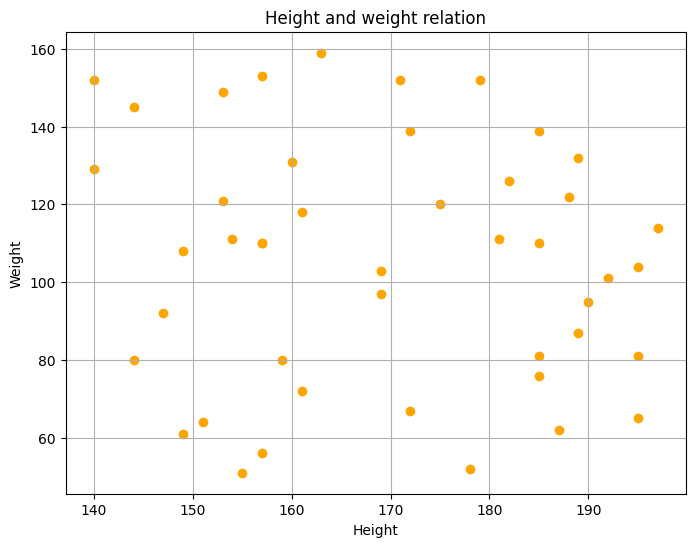

In [25]:
h = without_noise[:, 1].astype(int)
w = without_noise[:, 2].astype(int)

plt.figure(figsize=(8, 6))
plt.scatter(h, w, color="orange")
plt.title("Height and weight relation") 
plt.xlabel("Height") 
plt.ylabel("Weight") 
plt.grid(True) 
plt.show()

---

## Exercise 2

Given a dataset of objects with 2 features, create new datasets where both features are normalised.

In [31]:
dataset2 = np.array([[116.87714213,  22.38724318],[ 98.05089468,  17.70419866],[121.91732905,  20.76950035],[150.60375643,  20.44777321],[116.15969721,  20.22792041],[175.55264595,  21.02920868],[130.2102414 ,  22.23461658],[117.79758934,  21.54449521],[199.05450964,  20.53902401],[155.00458477,  20.67588878],[160.27851623,  20.30877322],[142.49587465,  18.75387901],[167.32252309,  21.2040159 ],[178.11489609,  19.52285308],[135.76602655,  18.01816954],[117.62628615,  20.95436217],[171.74626081,  20.37269529],[130.11860385,  19.56387712],[122.68044125,  21.48927022],[159.43238282,  21.38030275],[108.78123817,  19.86203164],[152.70729255,  21.24708246],[143.64358057,  21.40357256],[209.68785285,  19.65378059],[133.08486628,  19.23372601],[138.2204662 ,  20.37983756],[143.65610499,  19.92235183],[143.29146765,  20.56157279],[106.79099845,  19.35181412],[208.89304694,  19.9697894 ],[183.55451445,  20.36281171],[144.46962995,  19.83011097],[174.87583233,  20.25079178],[137.33207546,  21.02909898],[187.74834101,  20.23883521],[127.59840561,  21.7328862 ],[110.15966458,  19.29460209],[130.82208863,  18.98107528],[166.72373008,  20.63258552],[154.50866392,  21.05583445],[190.93412702,  21.08776453],[148.62481651,  19.40248102],[115.50503568,  18.39916603],[155.39233722,  20.23610734],[146.44242825,  20.30917973],[114.21209804,  19.10945672],[140.4159023 ,  19.96369514],[140.82108456,  20.05603083],[129.50278428,  18.92210224],[174.88635445,  19.03980704]])

1. Normalise features with $[0,1]$-scaling

In [33]:
normalizedData = (dataset2-np.min(dataset2))/(np.max(dataset2)-np.min(dataset2)) 
print(normalizedData)

[[0.51656973 0.02439293]
 [0.418508   0.        ]
 [0.54282293 0.01596647]
 [0.69224413 0.01429067]
 [0.51283271 0.0131455 ]
 [0.82219733 0.01731923]
 [0.58601886 0.02359794]
 [0.52136413 0.02000325]
 [0.94461329 0.01476597]
 [0.71516706 0.01547887]
 [0.74263779 0.01356665]
 [0.65001198 0.00546755]
 [0.77932845 0.01822977]
 [0.83554352 0.00947296]
 [0.61495771 0.0016354 ]
 [0.52047185 0.01692938]
 [0.80237072 0.0138996 ]
 [0.58554154 0.00968665]
 [0.54679781 0.01971559]
 [0.73823047 0.01914801]
 [0.47439997 0.01123967]
 [0.70320098 0.01845409]
 [0.65599013 0.01926921]
 [1.         0.01015494]
 [0.60099214 0.00796697]
 [0.62774234 0.01393681]
 [0.65605537 0.01155386]
 [0.65415605 0.01488342]
 [0.46403325 0.00858206]
 [0.99586003 0.01180096]
 [0.86387727 0.01384812]
 [0.66029283 0.0110734 ]
 [0.81867196 0.01326464]
 [0.62311491 0.01731866]
 [0.88572198 0.01320236]
 [0.57241439 0.02098453]
 [0.48157988 0.00828406]
 [0.58920584 0.00665097]
 [0.77620947 0.01525331]
 [0.71258392 0.01745792]


2. Normalise features with Gaussian normalisation

In [36]:
mean_val = np.mean(dataset2)
std_val = np.std(dataset2)
Gaussian_normalized = (dataset2 - mean_val) / std_val #z-score
print(Gaussian_normalized)

[[ 0.50690967 -0.92417146]
 [ 0.22177986 -0.99509773]
 [ 0.58324499 -0.94867271]
 [ 1.01771053 -0.95354538]
 [ 0.49604373 -0.95687512]
 [ 1.3955698  -0.94473934]
 [ 0.70884392 -0.92648304]
 [ 0.52085015 -0.93693516]
 [ 1.75151339 -0.95216335]
 [ 1.08436254 -0.95009049]
 [ 1.164238   -0.95565058]
 [ 0.89491395 -0.97919997]
 [ 1.27092184 -0.94209183]
 [ 1.43437594 -0.9675536 ]
 [ 0.79298814 -0.99034254]
 [ 0.51825571 -0.94587292]
 [ 1.33792083 -0.95468246]
 [ 0.70745604 -0.96693228]
 [ 0.59480258 -0.93777156]
 [ 1.15142303 -0.93942191]
 [ 0.3842945  -0.96241663]
 [ 1.04956929 -0.94143957]
 [ 0.91229634 -0.93906948]
 [ 1.91255893 -0.96557066]
 [ 0.75238108 -0.97193253]
 [ 0.83016145 -0.95457429]
 [ 0.91248602 -0.96150306]
 [ 0.90696347 -0.95182185]
 [ 0.35415165 -0.97014405]
 [ 1.90052133 -0.9607846 ]
 [ 1.51676078 -0.95483215]
 [ 0.92480713 -0.96290008]
 [ 1.38531924 -0.95652873]
 [ 0.81670648 -0.944741  ]
 [ 1.58027769 -0.95670981]
 [ 0.66928679 -0.93408191]
 [ 0.40517123 -0.97101054]
 

3. In three different plots show the original data, $[0,1]$-normilised, and Gaussian normalised data.

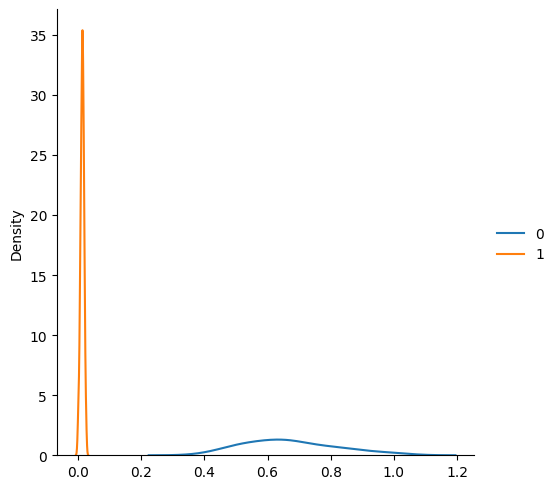

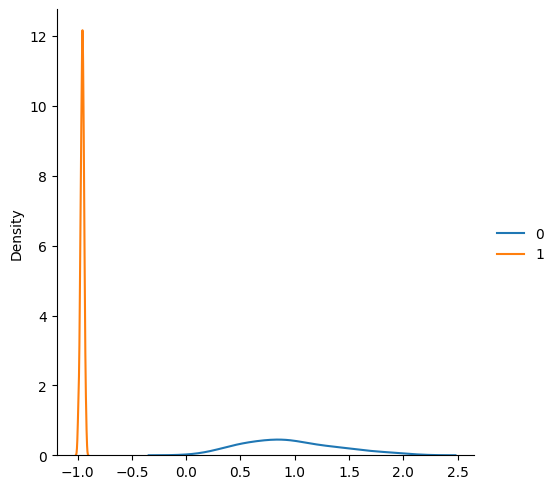

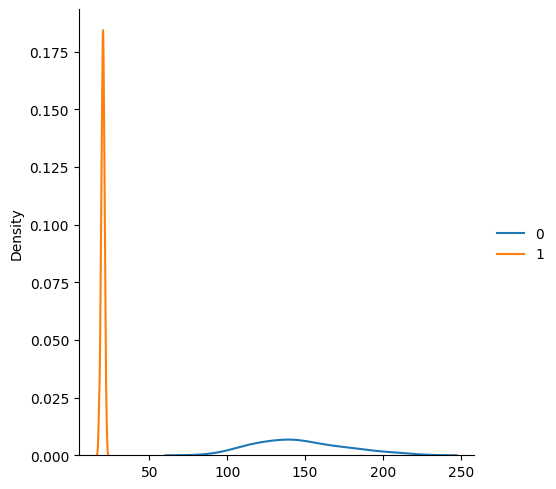

In [45]:
sns.displot(normalizedData, kind='kde')
sns.displot(Gaussian_normalized, kind='kde')
sns.displot(dataset2, kind='kde')

---

## Exercise 3

Given training ($\texttt{y_true}$) and predicted ($\texttt{y_pred}$) data for binary classification, where 1 corresponds to the positive class and 0 corresponds to the negative class, compute
1. The number of True Positives, True Negatives, False Positives, False Negatives
2. Accuracy
3. Precision
4. Recall
5. F-score

In [ ]:
y_true = np.array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

---

## Exercise 4

Given training and predicted data for 4-class classification, where classes are 0,1,2,3

In [ ]:
y_true = np.array([1, 2, 3, 0, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 1, 0, 3, 1, 2, 0, 0, 1,3, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 2, 0, 3, 3, 3, 2, 0, 1, 3, 0, 1,3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2, 2, 1, 1,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 1, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2,2, 0, 2, 0, 0, 3, 0, 2, 2, 0, 1, 1, 2, 2, 3, 0, 1, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 2, 2, 3, 3, 1, 3,1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 2, 1, 3,1, 0])
y_pred = np.array([1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 3, 1, 2, 1, 3, 2, 3, 1, 1, 2, 3, 0, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 3, 1, 0, 0, 1, 3, 1, 0, 1,3, 3, 3, 3, 3, 1, 3, 1, 2, 2, 0, 2, 0, 3, 3, 3, 0, 2, 2, 3, 2, 2,3, 3, 2, 2, 1, 3, 3, 2, 3, 2, 3, 2, 2, 0, 3, 1, 2, 3, 3, 1, 2, 2,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 2, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 0, 3, 2, 2, 0, 3, 3, 3, 2, 1, 2, 3,2, 0, 2, 0, 0, 3, 0, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 0, 3, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 2, 3, 3, 2, 3,1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 3, 1, 3,1, 0])

1. Compute the confusion matrix, i.e. a 4x4 matrix $\overline{A}$, in which an element $\overline{A}_{i,j}$ contains the number of elements that were predicted to be in class $i$, while their true class is $j$

2. Compute Precision, Recall, F-score for every class, and compute the macro F-score